In [56]:
# Pricing digital option modello CEV con metodo Crank-Nicholson

import math as mt
import numpy as np

In [57]:
## input

# mercato
r = 0.001
S0 = 1
K = 1
T = 1
# calibrazione
sigma = 0.4
beta = 1.5
# discretizzazione
M = 1500
N = 1000
# theta metodo (Crank-Nicholson)
theta = 0.5

In [58]:
# griglia

Smin = 0.2*S0
Smax = 1.4*S0

dS = (Smax-Smin)/N
dt = T/M

# x = np.zeros((N+1,1))
S = np.zeros((N+1,1))
for i in range(0,N+1):
    # x[i,0] = 
    S[i,0] = Smin + i*dS
print(Smin)
print(S[0,0])
print(Smax)
print(S[-1,0])

[[0.2   ]
 [0.2012]
 [0.2024]
 ...
 [1.3976]
 [1.3988]
 [1.4   ]]
0.2
0.2
1.4
1.4


In [59]:
# Costruisco matrice
AE = (1-theta)*(-r*S[i,0]/(2*dS) + sigma**2*(S[i,0]**(2*(beta)))/(2*dS**2))
A = np.zeros((N+1,N+1))
A[0,0]=1
for i in range(1,N):
    A[i,i-1] = (1-theta)*(-(r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))     # alpha
    A[i,i] = -1/dt + (1-theta)*(-sigma**2/(dS**2)*(S[i,0]**(2*(beta))) - r)                 # omega
    A[i,i+1] = (1-theta)*((r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))      # gamma
A[-1,-1] = 1

# Matrice rhs
B = np.zeros((N+1,N+1))
for i in range(1,N):
    B[i,i-1] = (-theta)*(-(r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta))))
    B[i,i] = -1/dt+(-theta)*(1-theta)*(-sigma**2/(dS**2)*(S[i,0]**(2*(beta))) - r)
    B[i,i+1] = (-theta)*((r*S[i,0])/(2*dS) + sigma**2/(2*dS**2)*(S[i,0]**(2*(beta)))) 


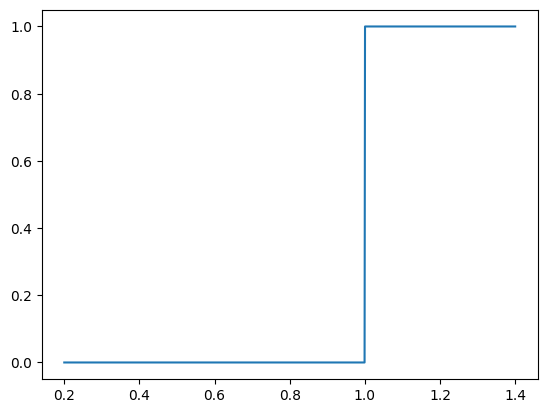

In [60]:
# Condizione finale

f = np.zeros((N+1,1))
for i in range(0,N+1):
    f[i,0] = 1 if (S[i,0]>K) else 0  

from matplotlib import pyplot as plt
plt.plot(S,f)

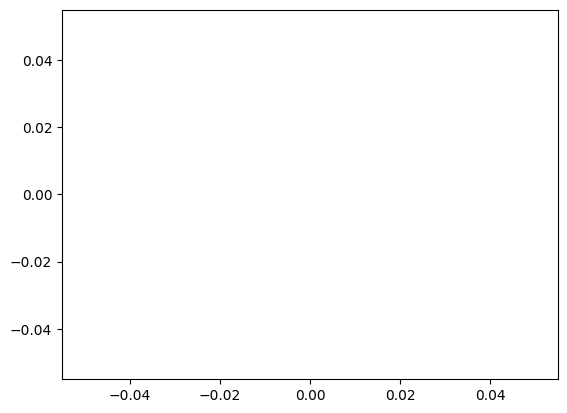

In [61]:
# Backward in time
rhs = np.zeros((N+1,1))
bc = np.zeros((N+1,1))
for j in range(M,0,-1):
    # termine noto sistema lineare
    bc[0,0] = 0
    bc[N,0] = Smax - K*mt.exp(-r*(T-(j-1)*dt))
    rhs = np.matmul(B,f)
    rhs = np.add(rhs,bc)
    # risolvo il sistema lineare
    f = np.linalg.solve(A,rhs)
plt.plot(S,f)

In [62]:
# Calcolare il prezzo
S = S.flatten() # da matrice a vettore
f = f.flatten()
Prezzo = np.interp(S0, S, f)
print(Prezzo)

nan


In [63]:
''' 
Crank-Nicholson è questo test con theta pari a 0.5
Nella lezione del 30 gennaio ha fatto tutti i conti a mano per il CEV
'''

' \nCrank-Nicholson è questo test con theta pari a 0.5\nNella lezione del 30 gennaio ha fatto tutti i conti a mano per il CEV\n'